In [25]:
import powerlaw
import pandas as pd
from textblob import TextBlob
import requests
import pickle
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
import re
import networkx as nx
import string
import re
from itertools import combinations

In [49]:
G = nx.read_gpickle('GraphG.pickle')

In [50]:
print(G.number_of_nodes(),G.number_of_edges(),nx.number_connected_components(G))

37812 478419 41


In [56]:
#stampa i bigrammi all interno dei connected components, con relativo conteggio e tutti 
#gli hashtag in cui sono comparse

components = nx.connected_components(G)
for component in components:
    subgraph = G.subgraph(component)
    edges = subgraph.edges(data=True)
    print("Edges in component:")
    for edge in edges:
        u,v, data=edge
        print(f"({u},{v}): weight:",1/data['weight'], data['attribute'],"\n")
    print("\n-----------------------\n")

(array([3.60000e+01, 5.00000e+01, 9.10000e+01, 1.21000e+02, 1.55000e+02,
        1.82000e+02, 1.92000e+02, 2.03000e+02, 1.98000e+02, 2.76000e+02,
        2.76000e+02, 2.60000e+02, 2.81000e+02, 2.63000e+02, 2.95000e+02,
        3.77000e+02, 3.16000e+02, 3.36000e+02, 3.90000e+02, 2.49000e+02,
        4.92000e+02, 3.09000e+02, 3.08000e+02, 7.22000e+02, 4.52000e+02,
        4.49000e+02, 0.00000e+00, 5.32000e+02, 6.17000e+02, 7.56000e+02,
        0.00000e+00, 8.01000e+02, 8.53000e+02, 0.00000e+00, 9.73000e+02,
        0.00000e+00, 1.19700e+03, 0.00000e+00, 0.00000e+00, 1.32900e+03,
        0.00000e+00, 1.58700e+03, 0.00000e+00, 0.00000e+00, 1.90600e+03,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.23700e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.66300e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 3.44500e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 4.10500e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

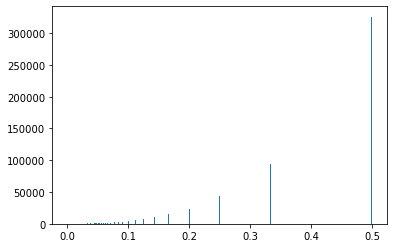

In [52]:
# istogramma dei weights
figura, grafico = plt.subplots()
grafico.hist(s, bins = len(np.unique(s)))

<ipython-input-53-cbfba6347b17>:18: RuntimeWarning: divide by zero encountered in log
  y = np.log(hist)


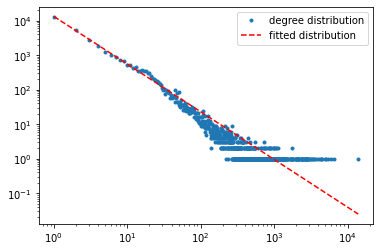

b=1.380089724470494


In [53]:
import numpy as np
from scipy.optimize import curve_fit
import networkx as nx
import matplotlib.pyplot as plt
k = nx.degree_histogram(G)


# define the function to fit
def expfunc(x, a, b):
    return a*pow(x,-b)

# bin the degree distribution
bins = np.arange(len(k))
hist = nx.degree_histogram(G)

# fit the logarithm of the degree distribution to a linear function
x = bins[1:]
y = np.log(hist)

popt, pcov = curve_fit(expfunc, x, k[1:])

# plot the degree distribution and the fitted distribution on a logarithmic scale
plt.plot(range(0, len(hist)), hist,'.',label='degree distribution')
plt.plot(x, expfunc(x, *popt), 'r--', label='fitted distribution')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

# print the estimated value of b
print(f"b={popt[1]}")